<center><h1>Traveling Salesman Problem by Djebbi Hani</h1></center>






In [ ]:
# Imports 
import numpy as np
import random

from datetime import datetime



*   According to the problem description, 15 cities will be the starting point.
*   there is 15! = 1307674368000 possible permutations
* i will start with only 100 as my population size.
* mutation rate will be 0.3



In [ ]:
# Parameters
n_cities = 15

n_population = 100

mutation_rate = 0.3

to sumulate this i will use a list of 15 Governorates of Tunisia and for each one i will associate a random cordinate [x,y].<br>
and as a fitness function i will use the euclidean distance.<br>
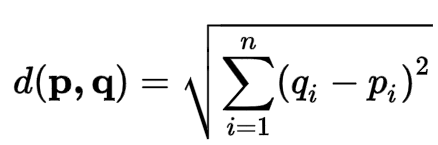

In [ ]:
# Generating a list of coordenades representing each city
coordinates_list = [[x,y] for x,y in zip(np.random.randint(0,100,n_cities),np.random.randint(0,100,n_cities))]
names_list = np.array(['Tunis', 'Ariana', 'Beja', 'Nabeul', 'Sousse', 'Bizerte', 'Kairouan', 'Sfax', 'Ben Arous', 'Gafsa', 'Kasserine', 'Kef', 'Mahdia', 'Manouba', 'Tozeur'])
cities_dict = { x:y for x,y in zip(names_list,coordinates_list)}

# Function to compute the distance between two points
def compute_city_distance_coordinates(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5

def compute_city_distance_names(city_a, city_b, cities_dict):
    return compute_city_distance_coordinates(cities_dict[city_a], cities_dict[city_b])

cities_dict

{'Tunis': [81, 29],
 'Ariana': [19, 90],
 'Beja': [54, 44],
 'Nabeul': [43, 83],
 'Sousse': [97, 11],
 'Bizerte': [91, 39],
 'Kairouan': [65, 6],
 'Sfax': [35, 55],
 'Ben Arous': [54, 54],
 'Gafsa': [9, 20],
 'Kasserine': [30, 82],
 'Kef': [83, 92],
 'Mahdia': [42, 73],
 'Manouba': [47, 97],
 'Tozeur': [67, 46]}

#1. Create the first population set<br>
We randomly shuffle the cities N times where N=population_size

In [ ]:
# First step: Create the first population set
def genesis(city_list, n_population):

    population_set = []
    for i in range(n_population):
        #Randomly generating a new solution
        sol_i = city_list[np.random.choice(list(range(n_cities)), n_cities, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)

population_set = genesis(names_list, n_population)
population_set


array([['Mahdia', 'Bizerte', 'Nabeul', ..., 'Ariana', 'Ben Arous',
        'Beja'],
       ['Ariana', 'Sfax', 'Manouba', ..., 'Kairouan', 'Tozeur',
        'Bizerte'],
       ['Tozeur', 'Kairouan', 'Mahdia', ..., 'Gafsa', 'Manouba',
        'Ben Arous'],
       ...,
       ['Gafsa', 'Nabeul', 'Manouba', ..., 'Ben Arous', 'Sousse', 'Kef'],
       ['Beja', 'Mahdia', 'Ariana', ..., 'Tunis', 'Sfax', 'Gafsa'],
       ['Nabeul', 'Ben Arous', 'Tunis', ..., 'Kasserine', 'Tozeur',
        'Bizerte']], dtype='<U9')

#2. Evaluate solutions fitness
The solutions are defined so that the first element on the list is the first city to visit, then the second, etc. and the last city is linked to the first. The fitness function needs to compute the distance between subsequent cities.

In [ ]:
def fitness_eval(city_list, cities_dict):
    total = 0
    for i in range(n_cities-1):
        a = city_list[i]
        b = city_list[i+1]
        total += compute_city_distance_names(a,b, cities_dict)
    return total


In [ ]:
def get_all_fitnes(population_set, cities_dict):
    fitnes_list = np.zeros(n_population)

    #Looping over all solutions computing the fitness for each solution
    for i in  range(n_population):
        fitnes_list[i] = fitness_eval(population_set[i], cities_dict)

    return fitnes_list

fitnes_list = get_all_fitnes(population_set,cities_dict)
fitnes_list


array([815.0292021 , 568.63232616, 758.99538803, 736.47394166,
       599.49437098, 688.31328047, 745.81338605, 732.66038222,
       698.73952395, 707.76111975, 853.07999399, 815.75645299,
       810.22856321, 789.76868279, 596.99588833, 778.29256072,
       726.11521395, 783.16362902, 678.24145855, 786.73112216,
       860.59372376, 807.93869307, 645.75226537, 674.58730774,
       676.55685713, 600.87806988, 748.45666508, 707.94152039,
       702.31503975, 709.84347503, 719.91181873, 696.00201131,
       864.99239886, 722.29859035, 706.69766934, 769.95406197,
       720.0616741 , 739.79250009, 648.53207568, 593.98330839,
       711.85930203, 525.68221596, 688.89675483, 781.15513501,
       700.43652481, 816.36576568, 767.04835151, 761.82006852,
       842.64040339, 744.86856771, 746.08420915, 728.0685637 ,
       742.37461618, 633.54340206, 719.37408737, 732.32903314,
       700.13554025, 711.83543503, 720.01421938, 731.07487421,
       783.28935854, 735.78422574, 707.61156119, 794.77

#3. Progenitors selection
I will select a new set of progenitors using the Roulette Wheel Selection. Generates a list of progenitor pairs where N= len(population_set) but at each position there are two solutions to merge

In [ ]:
def progenitor_selection(population_set,fitnes_list):
    total_fit = fitnes_list.sum()
    prob_list = fitnes_list/total_fit
    
    #Notice there is the chance that a progenitor. mates with oneself
    progenitor_list_a = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    progenitor_list_b = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    
    progenitor_list_a = population_set[progenitor_list_a]
    progenitor_list_b = population_set[progenitor_list_b]
    
    
    return np.array([progenitor_list_a,progenitor_list_b])


progenitor_list = progenitor_selection(population_set,fitnes_list)
progenitor_list[0][2]


array(['Tozeur', 'Kasserine', 'Ariana', 'Beja', 'Kef', 'Bizerte', 'Tunis',
       'Mahdia', 'Gafsa', 'Sousse', 'Kairouan', 'Ben Arous', 'Sfax',
       'Nabeul', 'Manouba'], dtype='<U9')

#4. Mating
For each pair of parents we'll generate an offspring pair. Since we cannot repeat cities what we'll do is copy a random chunk from one progenitor and fill the blanks with the other progenitor.

In [ ]:
def mate_progenitors(prog_a, prog_b):
    offspring = prog_a[0:5]

    for city in prog_b:

        if not city in offspring:
            offspring = np.concatenate((offspring,[city]))

    return offspring
            
    
    
def mate_population(progenitor_list):
    new_population_set = []
    for i in range(progenitor_list.shape[1]):
        prog_a, prog_b = progenitor_list[0][i], progenitor_list[1][i]
        offspring = mate_progenitors(prog_a, prog_b)
        new_population_set.append(offspring)
        
    return new_population_set

new_population_set = mate_population(progenitor_list)
new_population_set[0]

array(['Mahdia', 'Kairouan', 'Tunis', 'Ben Arous', 'Tozeur', 'Kasserine',
       'Manouba', 'Bizerte', 'Kef', 'Sfax', 'Sousse', 'Beja', 'Gafsa',
       'Ariana', 'Nabeul'], dtype='<U9')

#5. Mutation
Now for each element of the new population we add a random chance of swapping

In [ ]:
def mutate_offspring(offspring):
    for q in range(int(n_cities*mutation_rate)):
        a = np.random.randint(0,n_cities)
        b = np.random.randint(0,n_cities)

        offspring[a], offspring[b] = offspring[b], offspring[a]

    return offspring
    
    
def mutate_population(new_population_set):
    mutated_pop = []
    for offspring in new_population_set:
        mutated_pop.append(mutate_offspring(offspring))
    return mutated_pop

mutated_pop = mutate_population(new_population_set)
mutated_pop[0]


array(['Nabeul', 'Kairouan', 'Sfax', 'Ben Arous', 'Kasserine', 'Tozeur',
       'Manouba', 'Bizerte', 'Kef', 'Tunis', 'Sousse', 'Gafsa', 'Beja',
       'Ariana', 'Mahdia'], dtype='<U9')

#6. Stopping
To select the stopping criteria we'll need to create a loop to stop first. Then I'll set it to loop at 10000 iterations.

In [ ]:
best_solution = [-1,np.inf,np.array([])]
for i in range(10000):
    if i%100==0: print(i, fitnes_list.min(), fitnes_list.mean(), datetime.now().strftime("%d/%m/%y %H:%M"))
    fitnes_list = get_all_fitnes(mutated_pop,cities_dict)
    
    #Saving the best solution
    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]
    
    progenitor_list = progenitor_selection(population_set,fitnes_list)
    new_population_set = mate_population(progenitor_list)
    
    mutated_pop = mutate_population(new_population_set)


0 525.6822159580023 722.902615483435 12/12/22 11:34
100 538.852342713441 717.3652411482736 12/12/22 11:34
200 534.5553394802545 713.608700180147 12/12/22 11:34
300 570.3041619233801 711.7379566336995 12/12/22 11:34
400 561.6437461159258 711.1218816583846 12/12/22 11:34
500 574.4317226330434 717.0975028104907 12/12/22 11:34
600 558.2151750492055 716.4971001515162 12/12/22 11:34
700 523.6283213121716 709.2762798391351 12/12/22 11:34
800 538.7428413998803 716.0636929962411 12/12/22 11:34
900 513.7408138084168 714.4142044235938 12/12/22 11:34
1000 517.1113820221468 718.807234158924 12/12/22 11:34
1100 490.5602938249689 722.1423253538092 12/12/22 11:34
1200 532.2660777573178 722.8056265360439 12/12/22 11:34
1300 544.938812045723 724.1223681967813 12/12/22 11:34
1400 589.2122608604859 727.6646589819469 12/12/22 11:34
1500 558.3024409348785 724.6642926425833 12/12/22 11:34
1600 537.3688977924331 705.7589866087576 12/12/22 11:34
1700 575.4379298571597 724.1015320433472 12/12/22 11:34
1800 535.

In [ ]:
best_solution

[1868,
 388.0647501477296,
 array([['Bizerte', 'Sousse', 'Kairouan', 'Gafsa', 'Tozeur', 'Tunis',
         'Beja', 'Ben Arous', 'Sfax', 'Mahdia', 'Kasserine', 'Ariana',
         'Nabeul', 'Manouba', 'Kef']], dtype='<U9')]

so the best solution is <br>
bizerte -> sousse -> kairaouan -> gafsa -> touzeur -> tunis -> beja -> ben arous -> sfax -> mahdia -> kasserine -> ariana -> nabeul -> manouba -> kef - > bizerte.